In [1]:
## import a library
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , accuracy_score,f1_score, precision_score,precision_recall_curve,roc_auc_score,roc_curve,recall_score, auc,average_precision_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend .plotting import plot_confusion_matrix;

In [2]:
## Read the Dataset
data = pd.read_excel('/content/credit_card.xls')

In [3]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
# we coyp the dataset
df = data.copy()

## Exploring The Datase

In [5]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
#checking the shape datset
df.shape

(30001, 25)

In [7]:
#checking the data columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
#information about overall dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

## corelation with matrix

In [9]:
#statical information about the dataset
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [10]:
# Create a heatmape
#f,ax=plt.subplots(figsize=(28,14))
#sns.heatmap(df.corr(),annot = True)

## Dealing With Missing Value

In [11]:
## Check the null value in dataset
df.isnull().sum()

,0
Unnamed: 0,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
X9,0


 ## Cleaning the dataset

In [12]:
## drop the first row from the datase
df.columns= df.iloc[0]
df.drop(labels= 0, axis = 0, inplace = True)

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
#checking the data columns after the removed the first columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [15]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,,,,,,,,,,,,,,,,,,,,,
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253


In [16]:
## Rename the the row Pay_o to PAY_1 in the dataseet
df.rename(columns={"PAY_0":"PAY_1"},inplace = True)

In [17]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
# Rename the target variable : 'default .payment.next .month 'to Default
df.rename(columns={"default payment next month":"Default"},inplace = True)
# drop first attribut "ID"
df.drop("ID",axis = 1,inplace= True)
#Class Lable to category
df["Default"]= df["Default"].astype('category')

In [19]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data visualization

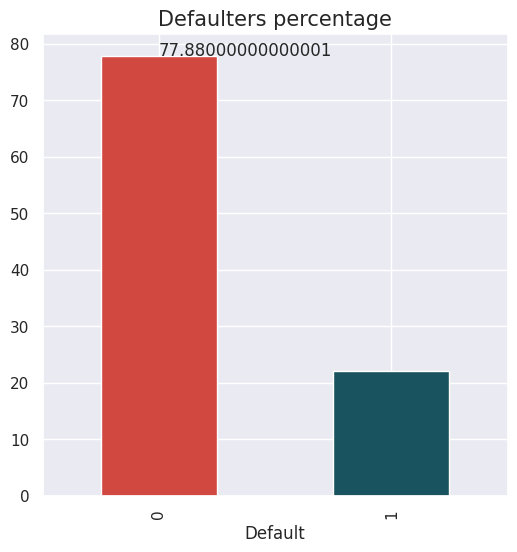

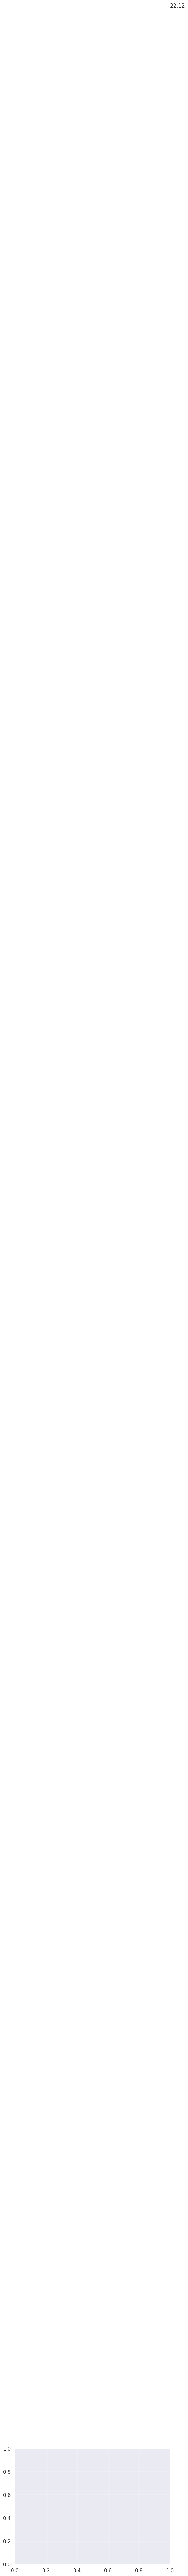

In [20]:
#We find the Defaulters and Non Defaulter
## Here o is denoted Non Defaulter And 1 is Defaulter
ax = df["Default"].value_counts(normalize = True)*100
ax.plot.bar(figsize = (6,6),color= ('#d14841','#195360'))
plt.title("Defaulters percentage", fontsize= 15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize= 12)
    plt.show()

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

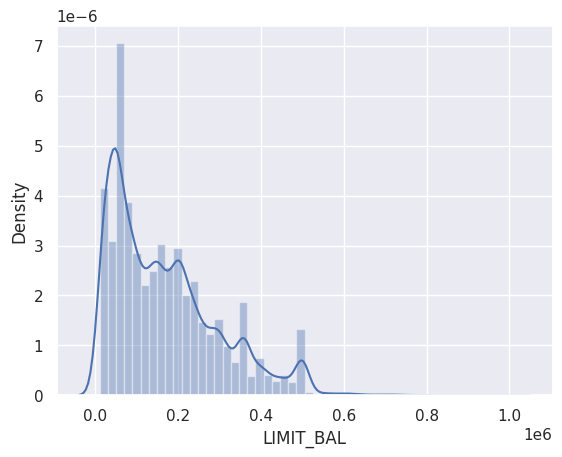

In [21]:
##create a plot to LIMIT_BAL
sns.distplot(df['LIMIT_BAL'])

<Axes: xlabel='AGE', ylabel='Density'>

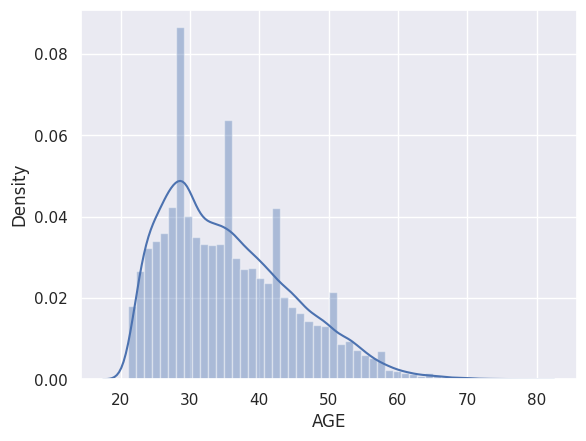

In [22]:
sns.distplot(df['AGE'])

<Axes: xlabel='EDUCATION', ylabel='count'>

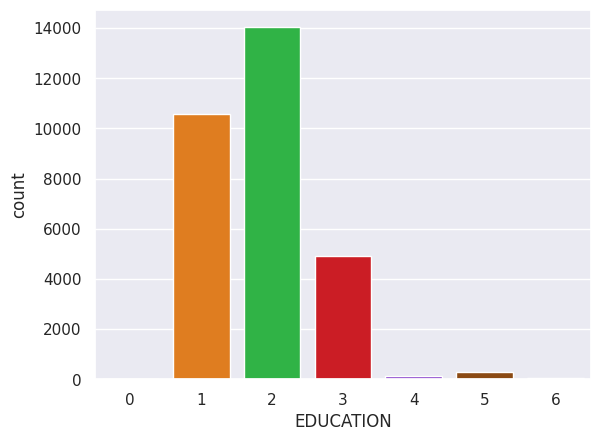

In [23]:
sns.countplot(x ='EDUCATION', data = df, palette = 'bright')

#The show that most people are of age range 20-40and a few only from 50-60 are group

## Let check the Defaulter by the AGE, SEX and Limit balance And Here 1 means not pat bill and 0 means pay bill

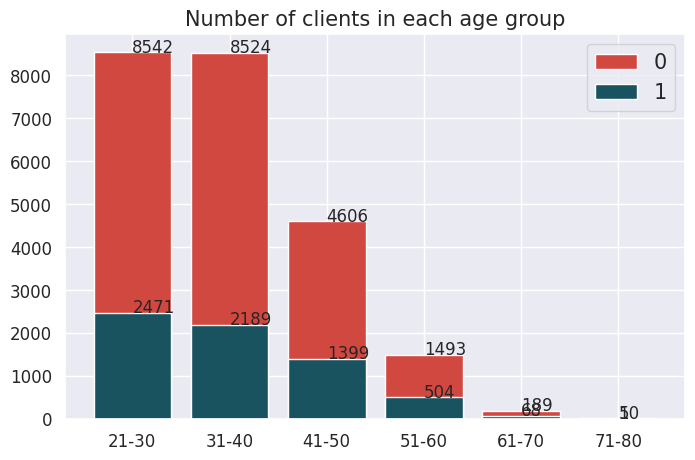

In [24]:
# Number of client in each age group how has Defaulter or Not Defaulter
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['Default'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['Default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0', color = ('#d14841'))
plt.bar(age_1.index, age_1.values, label='1', color = ('#195360'))
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

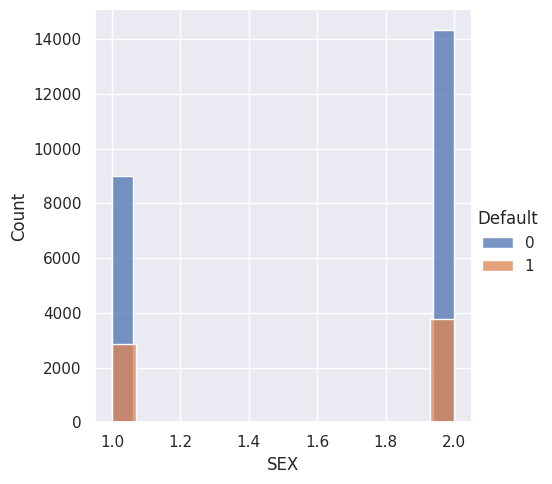

In [25]:
## Create a histgram on sex in dataset
sns.FacetGrid(df, hue= 'Default', height = 5).map(sns.histplot, 'SEX').add_legend() # Changed 'size' to 'height'

<Axes: xlabel='Default', ylabel='SEX'>

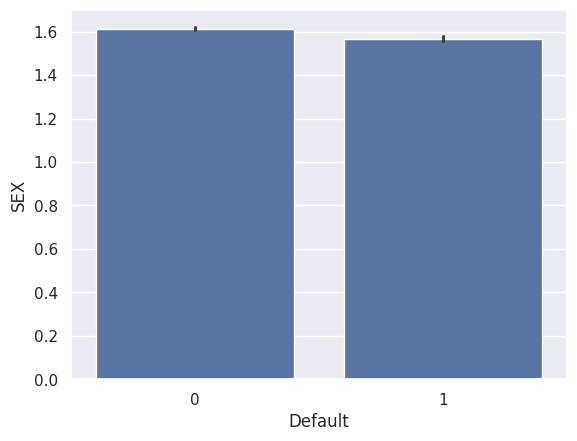

In [26]:
## create a Bar plot
sns.barplot(x= 'Default',y = 'SEX', data=df )

In [27]:
def getColumnsName(prefix):
    return [prefix+str(x) for x in range(1,7)]

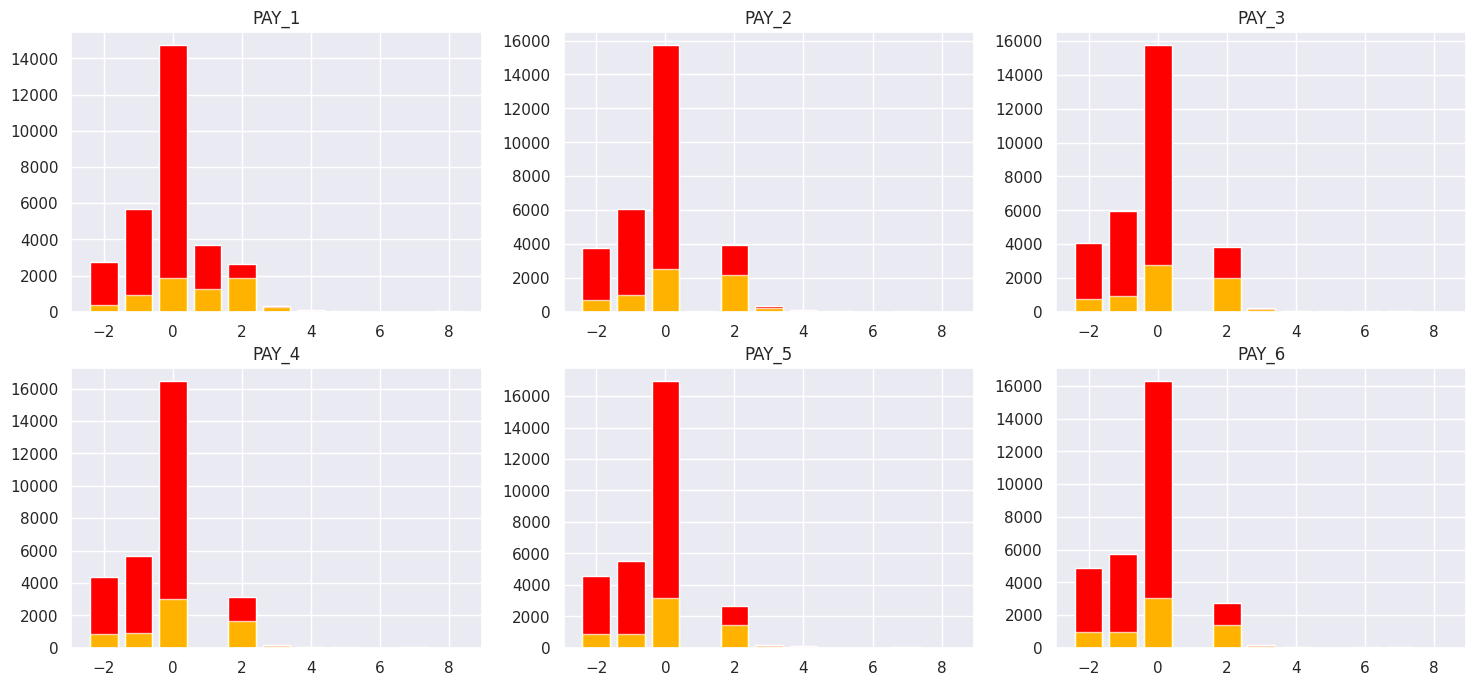

In [28]:
# PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 tells about the default in 6 month using fasho
pay_status_columns = getColumnsName('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['Default']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])




plt.show()

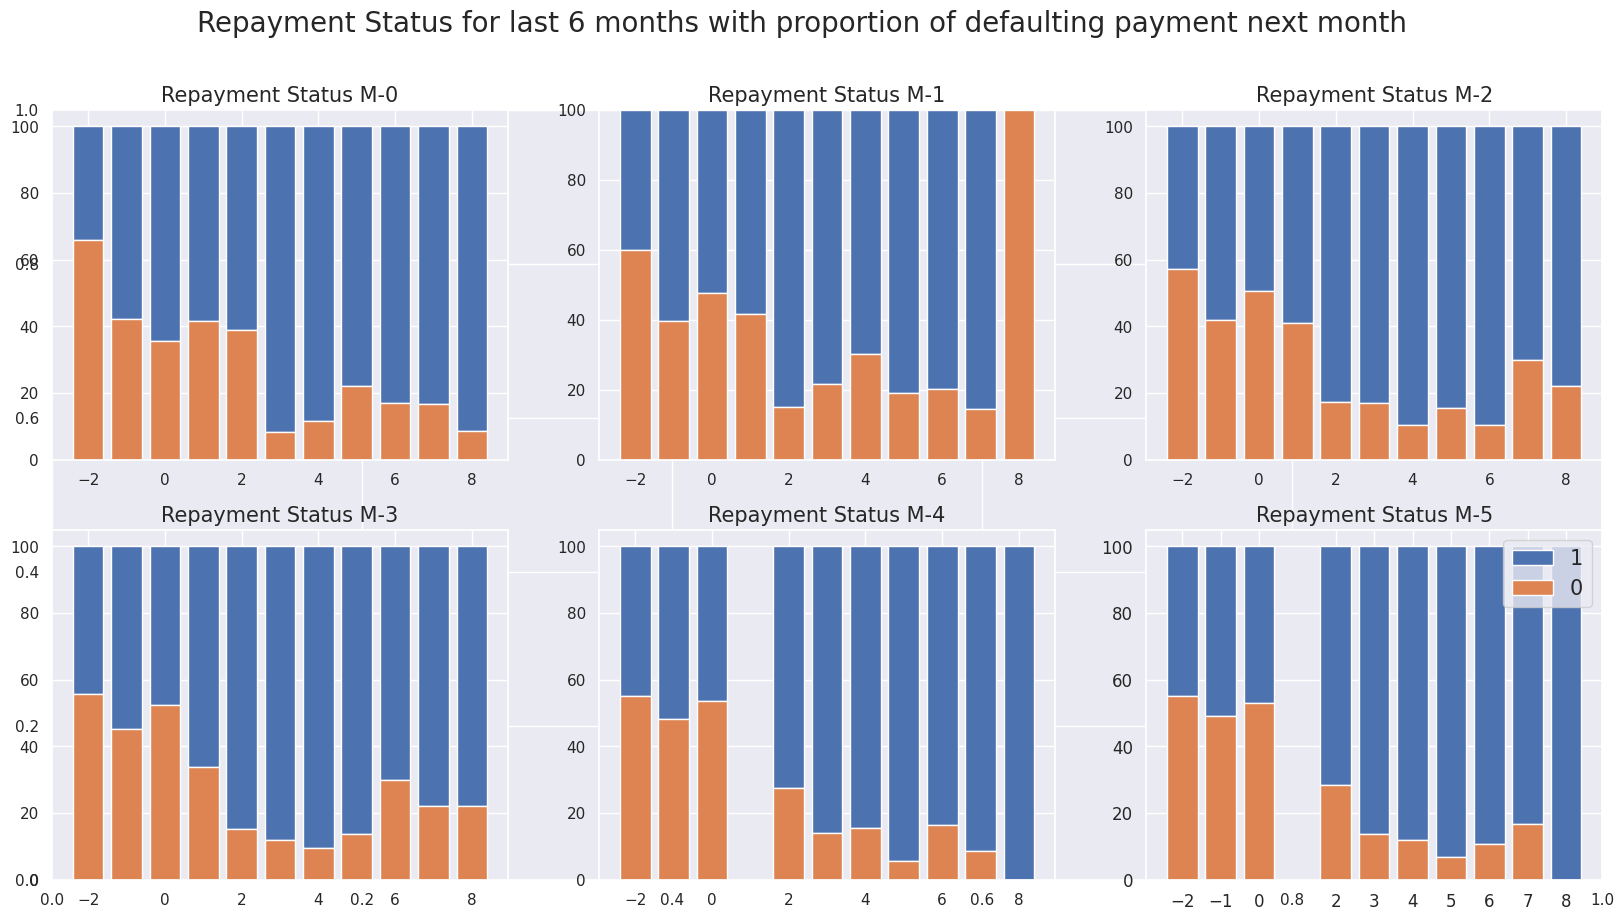

In [29]:
plt.subplots(figsize=(20,10))

ind = sorted(df.PAY_1.unique())
pay_0 = (df.PAY_1[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_1[df['Default'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(df.PAY_2.unique())
pay_0 = (df.PAY_2[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_2[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(df.PAY_3.unique())
pay_0 = (df.PAY_3[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_3[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(df.PAY_4.unique())
pay_0 = (df.PAY_4[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_4[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(df.PAY_5.unique())
pay_0 = (df.PAY_5[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_5[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(df.PAY_6.unique())
pay_0 = (df.PAY_6[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_6[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

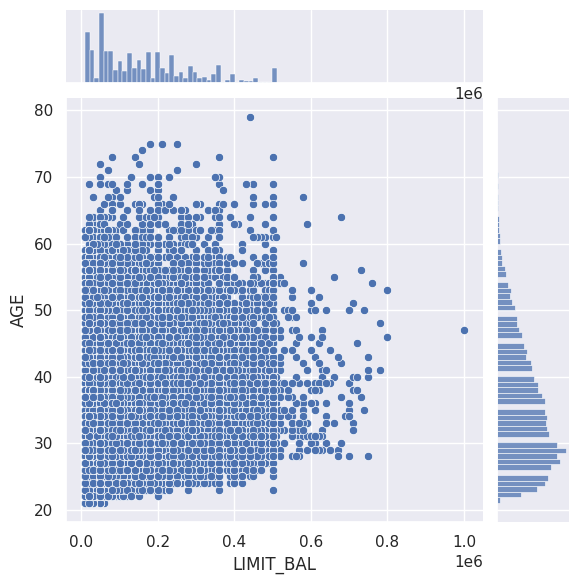

In [30]:
sns.jointplot(x='LIMIT_BAL',y = 'AGE',data = df, kind = "scatter")

## Plotting Defaltuers by using Marriage

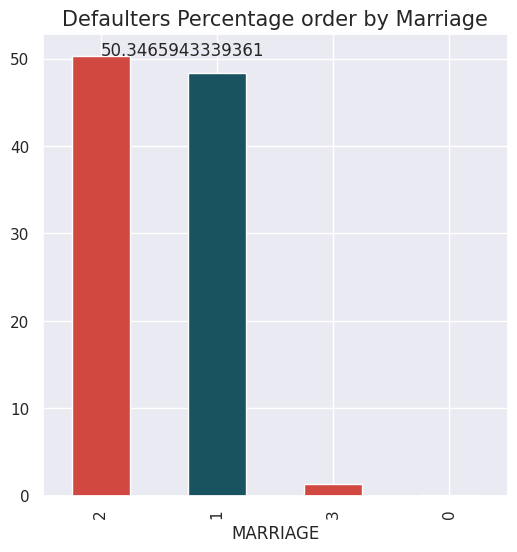

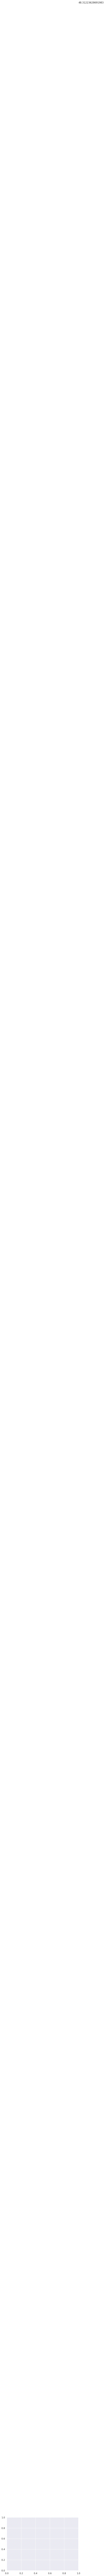

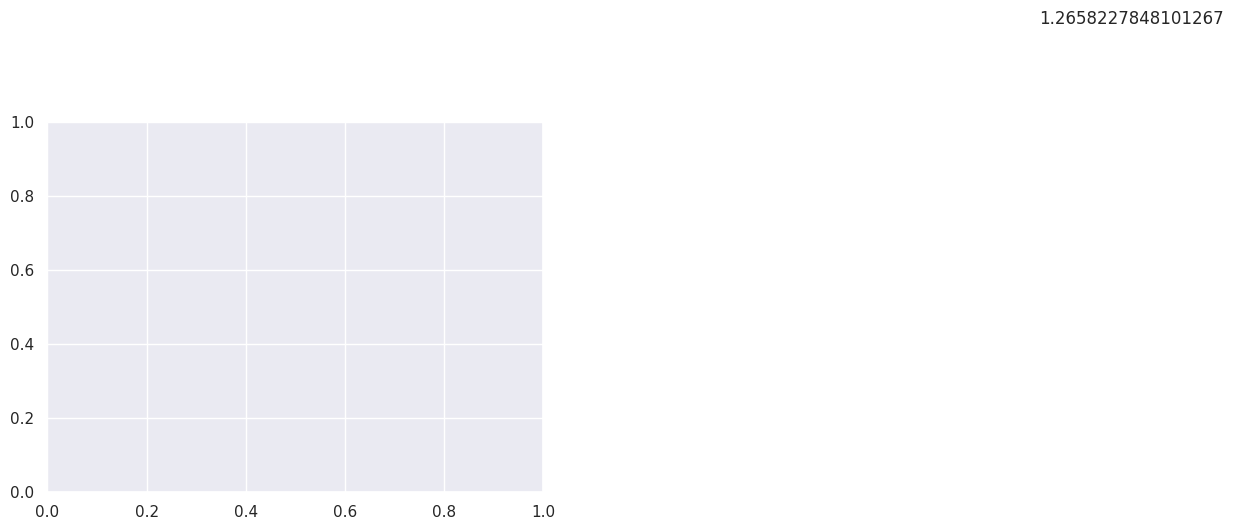

In [31]:
ax= df[df['Default'] == 1]['MARRIAGE'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6),color = ('#d14841','#195360'))

plt.title("Defaulters Percentage order by Marriage",fontsize = 15)

for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize = 12)
    plt.show()

In [32]:
## Check the informaatio the Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  object  
 1   SEX        30000 non-null  object  
 2   EDUCATION  30000 non-null  object  
 3   MARRIAGE   30000 non-null  object  
 4   AGE        30000 non-null  object  
 5   PAY_1      30000 non-null  object  
 6   PAY_2      30000 non-null  object  
 7   PAY_3      30000 non-null  object  
 8   PAY_4      30000 non-null  object  
 9   PAY_5      30000 non-null  object  
 10  PAY_6      30000 non-null  object  
 11  BILL_AMT1  30000 non-null  object  
 12  BILL_AMT2  30000 non-null  object  
 13  BILL_AMT3  30000 non-null  object  
 14  BILL_AMT4  30000 non-null  object  
 15  BILL_AMT5  30000 non-null  object  
 16  BILL_AMT6  30000 non-null  object  
 17  PAY_AMT1   30000 non-null  object  
 18  PAY_AMT2   30000 non-null  object  
 19  PAY_AMT3   30000 non-null

In [33]:
## Drop the AGE_BIN in dataset and stor df_final
df_final = df.drop(['AGE_BIN'],axis = 1)

In [34]:
## convert the LIMIT_BAL And AGE object dtypes into int64.
df_final.LIMIT_BAL = df_final.LIMIT_BAL.astype("int64")
df_final.AGE = df_final.AGE.astype("int64")

In [35]:
df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
## check the information of our the datasdet.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  int64   
 1   SEX        30000 non-null  object  
 2   EDUCATION  30000 non-null  object  
 3   MARRIAGE   30000 non-null  object  
 4   AGE        30000 non-null  int64   
 5   PAY_1      30000 non-null  object  
 6   PAY_2      30000 non-null  object  
 7   PAY_3      30000 non-null  object  
 8   PAY_4      30000 non-null  object  
 9   PAY_5      30000 non-null  object  
 10  PAY_6      30000 non-null  object  
 11  BILL_AMT1  30000 non-null  object  
 12  BILL_AMT2  30000 non-null  object  
 13  BILL_AMT3  30000 non-null  object  
 14  BILL_AMT4  30000 non-null  object  
 15  BILL_AMT5  30000 non-null  object  
 16  BILL_AMT6  30000 non-null  object  
 17  PAY_AMT1   30000 non-null  object  
 18  PAY_AMT2   30000 non-null  object  
 19  PAY_AMT3   30000 non-null

## converting the columns of Sex ,eduction into continuous variable from object type with pandas get_dummies encodinh

In [37]:
pd.get_dummies(columns= ['SEX','EDUCATION'],prefix = ['SEX','EDUCATION'],data = df_final, drop_first = True )

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,Default,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,True,False,True,False,False,False,False
2,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,True,False,True,False,False,False,False
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,0,True,False,True,False,False,False,False
4,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,0,True,False,True,False,False,False,False
5,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,5000,1000,0,False,False,False,True,False,False,False
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,...,0,0,0,False,False,False,True,False,False,False
29998,30000,2,37,4,3,2,-1,0,0,3565,...,2000,3100,1,False,False,True,False,False,False,False
29999,80000,1,41,1,-1,0,0,0,-1,-1645,...,52964,1804,1,False,False,False,True,False,False,False


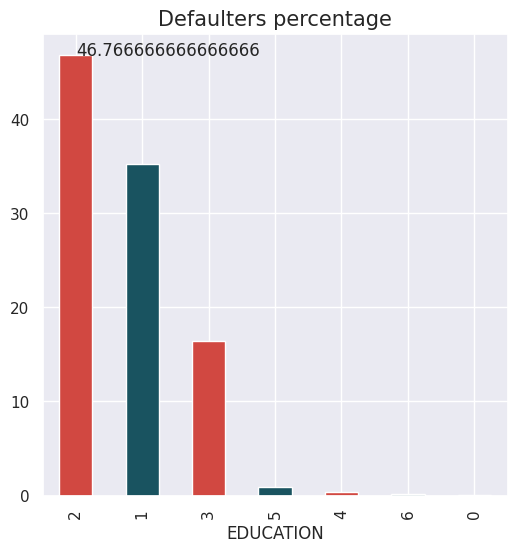

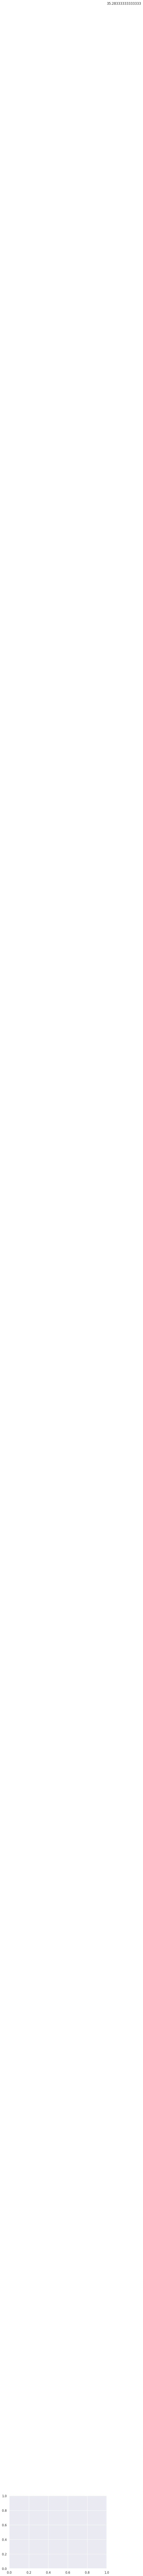

In [38]:
#We find the Defaulters and Non Defaulter by the EDUCTION
ax = df["EDUCATION"].value_counts(normalize = True)*100
ax.plot.bar(figsize = (6,6),color= ('#d14841','#195360'))
plt.title("Defaulters percentage", fontsize= 15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize= 12)
    plt.show()

<Axes: xlabel='LIMIT_BAL'>

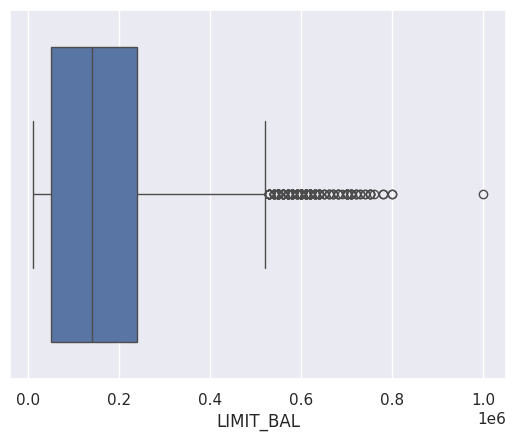

In [39]:
sns.boxplot(x = 'LIMIT_BAL', data = df)

<Axes: xlabel='PAY_AMT6'>

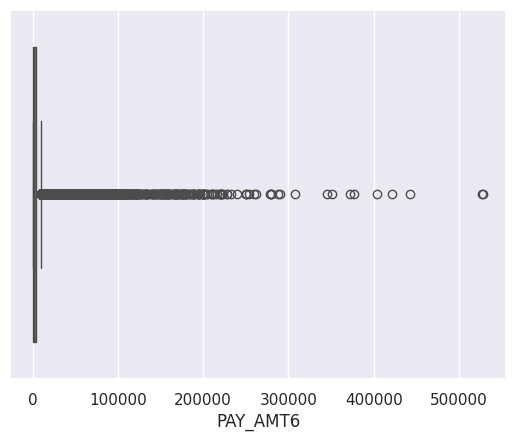

In [40]:
sns.boxplot(x = 'PAY_AMT6', data = df)

## classifier the dataset in target and features variable

In [41]:
# Define the Data set into target and Features varible on y and X
x= df_final.iloc[:,:-1]
y= df_final['Default']

In [42]:
## Here we define the dataset x_train,x_test ,y_train and y_test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 24,stratify = y)

In [43]:
## Double-click (or enter )to edit
y_train = y_train.astype("int")


In [44]:
y = y.astype('int')

In [45]:
## Shape of x_train, x_test, y_train, y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


## Training and Scaling the Data

## predict the data to using  Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
# Fit the LogisticRegression
logmodel.fit(x_train,y_train)
LogisticRegression(random_state = 1)

LogisticRegression(random_state=1)

In [47]:
# Predict the Logistic Regression model
predictions = logmodel.predict(x_test)

In [48]:
# Find the Accuracy score
accuracy_score = accuracy_score(y_test, predictions)

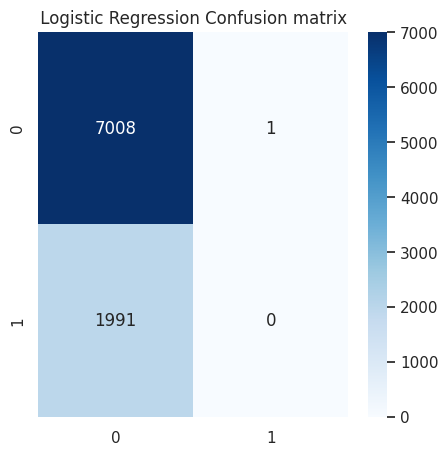

In [49]:
# Confusion Matrix
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt= 'd', cmap = 'Blues')
plt.title(" Logistic Regression Confusion matrix ")
plt.show()

In [50]:
# Display the model Accuracy score and performnce
print(f'Accuracy score for Logistic Regression: {accuracy_score}')
print('/nLogistic Regression Classification Report')
print(classification_report(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy score for Logistic Regression: 0.7786666666666666
/nLogistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



## Here the predict the dataset And 0 = Not Defaulters and 1 = Defaulters

In [51]:
## Here we predict the dataset fro x_test S
y_pred = logmodel.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# Here we find the model ,Accuracy Score ,Precision,Recall,F1-Score , Roc in our model.
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score # Import accuracy_score here

roc = roc_auc_score(y_test, y_pred)
auc = accuracy_score(y_test, y_pred) # Now this refers to the imported function
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression',auc,prec,rec,f1,roc]],
                      columns = ['Model','Accuracy', 'precision', 'Recall', 'F1 score', 'ROC'])
results

,Model,Accuracy,precision,Recall,F1 score,ROC
0,Logistic Regression,0.778667,0.0,0.0,0.0,0.499929


# Predict the value usinig Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
# Fit the DecisionTreeClassifier
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
# Predidted the DecisionTreeClassifier model
dt_pred= dt.predict(x_test)

In [55]:
# Find the Accouracy Score of DecisionTreeClassifier
Tree_accuracy = accuracy_score(y_test, dt_pred)

In [56]:
# Display the model Accuracy score and performnce
print(f'Accuracy score for DecisionTreeClassifier: {Tree_accuracy}')
print('/nDecisionTreeClassifier Classification Report')
print(classification_report(y_test, dt_pred))

Accuracy score for DecisionTreeClassifier: 0.7281111111111112
/nDecisionTreeClassifier Classification Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.40      0.44      0.41      1991

    accuracy                           0.73      9000
   macro avg       0.62      0.62      0.62      9000
weighted avg       0.74      0.73      0.73      9000



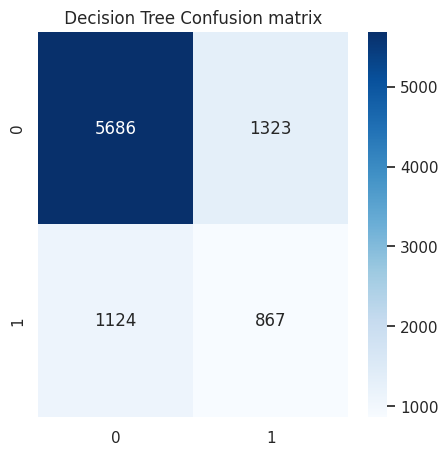

In [57]:
# Confusion Matrix of Decision Tree
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot = True, fmt= 'd', cmap = 'Blues')
plt.title(" Decision Tree Confusion matrix ")
plt.show()

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 400)
# Fit the RandomForestClassifier Model
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400)

In [60]:
# Predicted the RandomForestClassifier Model
rfc_pred = rfc.predict(x_test)

In [61]:
# Calculate the Accuracy Score of Random Forest
rfc_accuracy = accuracy_score(y_test, rfc_pred)

In [62]:
# Display the model Accuracy score and performnce
print(f'Accuracy score for Random Forest : {rfc_accuracy}')
print('/nRandom Forest Classification Report')
print(classification_report(y_test, rfc_pred))

Accuracy score for Random Forest : 0.8168888888888889
/nRandom Forest Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



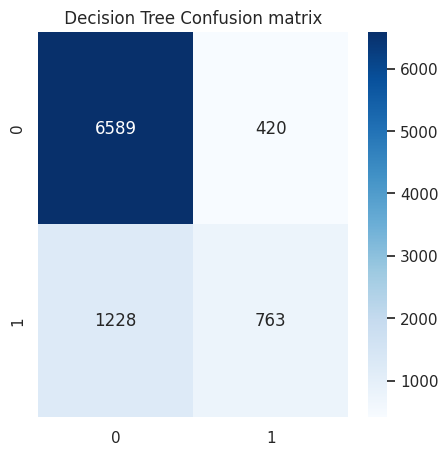

In [63]:
# Confusion Matrix of Random Forest
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, fmt= 'd', cmap = 'Blues')
plt.title(" Decision Tree Confusion matrix ")
plt.show()

## Stochastic Gradient Descent

In [64]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log_loss',penalty = 'l1', learning_rate = 'optimal', random_state = 1) # Changed loss to 'log_loss'
# Fit the SGDClassifier Model
sgd .fit(x_train, y_train)

SGDClassifier(loss='log_loss', penalty='l1', random_state=1)

In [65]:
## Predict the value in dataset
y_pred = sgd.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
### Here we find the model ,Accuracy Score ,Precision,Recall,F1-Score , Roc in our model.
roc = roc_auc_score(y_test, y_pred)
auc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression',auc,prec,rec,f1,roc]],
                      columns = ['Model','Accuracy', 'precision', 'Recall', 'F1 score', 'ROC'])
results

,Model,Accuracy,precision,Recall,F1 score,ROC
0,Logistic Regression,0.778444,0.428571,0.00452,0.008946,0.501404


## LDA (Linear Discriminant Analysis)

In [67]:
## find the unique value
np.unique(y)

array([0, 1])

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA_transform = LDA.fit_transform(x,y)

In [69]:
LDA.explained_variance_ratio_

array([1.])

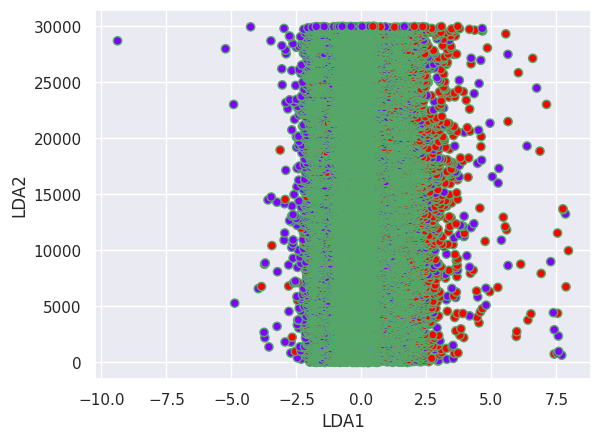

In [70]:
##import matplotlib.pyplot as plt
plt.xlabel("LDA1")
plt.ylabel("LDA2")
# The LDA_transform array only has one dimension, so we need to use it directly for the x-axis
# and create a range for the y-axis.
plt.scatter(LDA_transform[:,0], range(len(LDA_transform)), c=y, cmap='rainbow', edgecolors='g')

## Predict the value usinig KNN (K-Nearest Neighbors )model

In [71]:
plt.style.use ('ggplot')

In [72]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test sccuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(x_train,y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test,y_test)

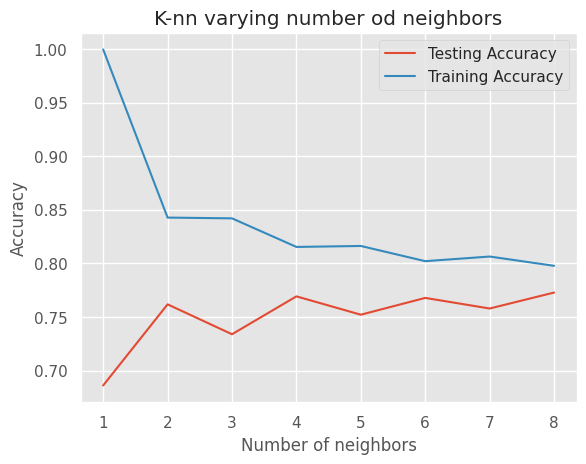

In [73]:
# Generate plot
plt.title('K-nn varying number od neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [74]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [75]:
# Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [76]:
knn.score(x_test,y_test)

0.7578888888888888

In [77]:
# Import the confusion matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [78]:
# let us get the predection using classifier we had fit above
knn_pred = knn.predict(x_test)
# Calculate the Accuracy Score
accuracy_score = accuracy_score(y_test, knn_pred)

In [79]:
# Display accuracy and performance metrics

print(f'Support Vector Machine Accuracy: {accuracy_score}')
print('\nSupport Vector Machine Classification Report:')
print(classification_report(y_test, knn_pred))

Support Vector Machine Accuracy: 0.7578888888888888

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      7009
           1       0.38      0.15      0.22      1991

    accuracy                           0.76      9000
   macro avg       0.59      0.54      0.54      9000
weighted avg       0.70      0.76      0.72      9000



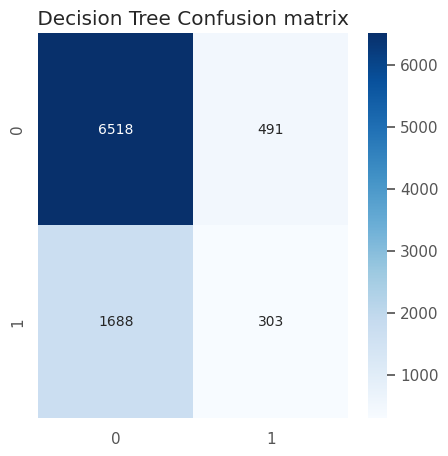

In [80]:
# Confusion Matrix of Random Forest
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot = True, fmt= 'd', cmap = 'Blues')
plt.title(" Decision Tree Confusion matrix ")
plt.show()

In [81]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

Text(0, 0.5, 'tpr')

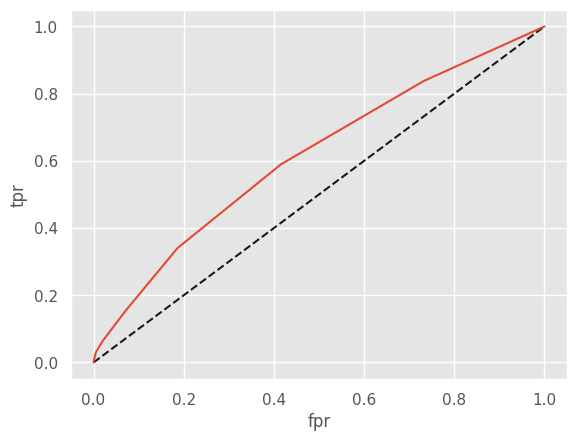

In [83]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label= 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [84]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6133955704078253

In [85]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [86]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [87]:
knn = KNeighborsClassifier()

In [88]:
knn_CV = GridSearchCV(knn,param_grid,cv = 5)


In [89]:
knn_CV.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [90]:
knn_CV.best_params_

{'n_neighbors': 26}

In [91]:
knn_CV.best_score_

0.7791333333333333

## AdaBoodt Model

In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import ensemble

# Creating classifier Object
ada = ensemble.AdaBoostClassifier()
#Fitting the classifier to training data
ada.fit(x_train,y_train)

# Making Predictions
ada_pred = ada.predict(x_test)

print("Traing Score:%f"%ada.score(x_train,y_train))
print("Testing Score:%f"%ada.score(x_test,y_test))



Traing Score:0.819905
Testing Score:0.817889


In [93]:
# Calculate and print the accuracy score
ada_accuracy = accuracy_score(y_test, ada_pred) # Store the result in a new variable
print(f'AdaBoost Accuracy: {ada_accuracy}') # Print the new variable

# Print classification report and confusion matrix
print(classification_report(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))

AdaBoost Accuracy: 0.8178888888888889
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

[[6678  331]
 [1308  683]]


## SMOTE Model

In [94]:
y.shape

(30000,)

In [95]:
y.value_counts()

,count
Default,
0,23364
1,6636


In [96]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [97]:
from collections import Counter
counter = Counter(y)
counter

Counter({1: 23364, 0: 23364})

Here we Used the SMOTE(Synthetic Minority Oversampling Technique) to balanced tha data set. now we see my data set is balanced.

## Random Forest with SMOTE

In [98]:
## Here we define the dataset x_train,x_test ,y_train and y_test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 24,stratify = y)

In [99]:
rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400)

In [100]:
rfc_pred = rfc.predict(x_test)

In [101]:
print(confusion_matrix(y_test, rfc_pred))

[[6468  542]
 [1144 5865]]


In [102]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7010
           1       0.92      0.84      0.87      7009

    accuracy                           0.88     14019
   macro avg       0.88      0.88      0.88     14019
weighted avg       0.88      0.88      0.88     14019



## Decision Tree with SMOTE

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
# Fit the DecisionTreeClassifier
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [104]:
# Predidted the DecisionTreeClassifier model
dt_pred= dt.predict(x_test)

In [105]:
# Find the Accouracy Score of DecisionTreeClassifier
Tree_accuracy = accuracy_score(y_test, dt_pred)

In [106]:
# Display the model Accuracy score and performnce
print(f'Accuracy score for DecisionTreeClassifier: {Tree_accuracy}')
print('/nDecisionTreeClassifier Classification Report')
print(classification_report(y_test, dt_pred))


Accuracy score for DecisionTreeClassifier: 0.8101148441400956
/nDecisionTreeClassifier Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7010
           1       0.80      0.82      0.81      7009

    accuracy                           0.81     14019
   macro avg       0.81      0.81      0.81     14019
weighted avg       0.81      0.81      0.81     14019



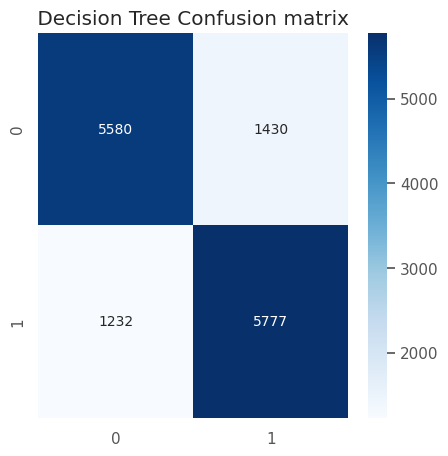

In [107]:
# Confusion Matrix of Decision Tree
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot = True, fmt= 'd', cmap = 'Blues')
plt.title(" Decision Tree Confusion matrix ")
plt.show()

## AdaBoost with SMOTE

In [108]:
from sklearn import ensemble

# Creating classifier Object
ada = ensemble.AdaBoostClassifier()
#Fitting the classifier to training data
ada.fit(x_train,y_train)

# Making Predictions
ada_pred = ada.predict(x_test)

print("Traing Score:%f"%ada.score(x_train,y_train))
print("Testing Score:%f"%ada.score(x_test,y_test))

Traing Score:0.855819
Testing Score:0.854626


In [109]:
print(accuracy_score(y_test,ada_pred))
print(classification_report(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))

0.8546258648976389
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      7010
           1       0.90      0.80      0.85      7009

    accuracy                           0.85     14019
   macro avg       0.86      0.85      0.85     14019
weighted avg       0.86      0.85      0.85     14019

[[6395  615]
 [1423 5586]]


## Logistic Regressions with SMOTE


In [123]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
LogisticRegression(random_state = 1)

LogisticRegression(random_state=1)

In [124]:
predictions = logmodel.predict(x_test)

In [125]:
print(confusion_matrix(y_test, predictions))


[[5185 1825]
 [3633 3376]]


In [128]:
# Here we find the model ,Accuracy Score ,Precision,Recall,F1-Score , Roc in our model.
roc = roc_auc_score(y_test, predictions)
auc = accuracy_score(y_test,predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1= f1_score(y_test, predictions)

results = pd.DataFrame([['Logistic Regression',auc,prec,rec,f1,roc]],
                      columns = ['Model','Accuracy', 'precision', 'Recall', 'F1 score', 'ROC'])
results

,Model,Accuracy,precision,Recall,F1 score,ROC
0,Logistic Regression,0.610671,0.649106,0.481666,0.552989,0.610662


In [141]:
import gradio as gr
import pandas as pd
import joblib

# Load trained Random Forest model
#rfc = joblib.load("fraud_detection_rfc_model.pkl")

def predict_fraud(LIMIT_BAL, AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
                   PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6):
    input_data = pd.DataFrame({
        'LIMIT_BAL': [LIMIT_BAL],
        'AGE': [AGE],
        'BILL_AMT1': [BILL_AMT1],
        'BILL_AMT2': [BILL_AMT2],
        'BILL_AMT3': [BILL_AMT3],
        'BILL_AMT4': [BILL_AMT4],
        'BILL_AMT5': [BILL_AMT5],
        'BILL_AMT6': [BILL_AMT6],
        'PAY_AMT1': [PAY_AMT1],
        'PAY_AMT2': [PAY_AMT2],
        'PAY_AMT3': [PAY_AMT3],
        'PAY_AMT4': [PAY_AMT4],
        'PAY_AMT5': [PAY_AMT5],
        'PAY_AMT6': [PAY_AMT6],
        'PAY_1': [PAY_1],
        'PAY_2': [PAY_2],
        'PAY_3': [PAY_3],
        'PAY_4': [PAY_4],
        'PAY_5': [PAY_5],
        'PAY_6': [PAY_6]
    })

    prediction = rfc.predict(input_data)
    return "Fraudulent Transaction" if prediction[0] == 1 else "Non-Fraudulent Transaction"

# Gradio Interface
interface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.Number(label="Credit Limit"),
        gr.Number(label="Age"),
        gr.Number(label="Bill Amount (Month 1)"),
        gr.Number(label="Bill Amount (Month 2)"),
        gr.Number(label="Bill Amount (Month 3)"),
        gr.Number(label="Bill Amount (Month 4)"),
        gr.Number(label="Bill Amount (Month 5)"),
        gr.Number(label="Bill Amount (Month 6)"),
        gr.Number(label="Payment Amount (Month 1)"),
        gr.Number(label="Payment Amount (Month 2)"),
        gr.Number(label="Payment Amount (Month 3)"),
        gr.Number(label="Payment Amount (Month 4)"),
        gr.Number(label="Payment Amount (Month 5)"),
        gr.Number(label="Payment Amount (Month 6)"),
        gr.Number(label="Previous Payment Status (Month 1)"),
        gr.Number(label="Previous Payment Status (Month 2)"),
        gr.Number(label="Previous Payment Status (Month 3)"),
        gr.Number(label="Previous Payment Status (Month 4)"),
        gr.Number(label="Previous Payment Status (Month 5)"),
        gr.Number(label="Previous Payment Status (Month 6)")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Credit Card Fraud Detection",
    description="Enter customer credit details to predict whether the transaction is fraudulent or not."
)

# Launch the Gradio app
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ee488755f53178011.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**This Gradio-based fraud detection system uses a trained Random Forest Classifier (RFC) to predict fraudulent credit card transactions. Users input financial details like credit limit, age, bill amounts, payment history, and previous payment statuses for six months. The model processes this data and predicts whether a transaction is fraudulent or not. The interface is built using Gradio, allowing for easy deployment and interaction.**

## conclusion of Dataset